# TFM - Performance assessment of the Android 12 positioning capabilities

### Master's degree in Advanced Telecommunication Technologies (MATT)

##### Diogo Corrêa Oliveira (diogo.correa@estudiantat.upc.edu)

In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy

#Read csv file with measurements results into dataframe
data = pd.read_csv("database/measurements.csv", sep=';')
df = pd.DataFrame(data)

### General Parameters

In [5]:
# Mapping Acess Point (AP) to the MAC
apDict = {
    "GRXCA-G06 (5180MHz)":"cc:f4:11:47:ef:e7#1",
    "GRXCA-L05 (5540MHz)":"c4:41:1e:fa:07:db#1",
    "GRXCA-L05 (5240MHz)":"c4:41:1e:fa:07:da#1",
    "GRXCA-G06 (2462MHz)":"cc:f4:11:47:ef:eb#1",
    "GRXCA-L05 (2427MHz)":"c4:41:1e:fa:07:d9#1"
}

# Mapping User Equipment (UE) and code used by the APP
ueDict = {
    "Pixel 4a":"Pixel 4a",
    "Pixel 3a":"Pixel 3a",
    "Pixel 6 Pro":"Pixel 6 Pro",
    "Xiaomi Mi 10T":"M2007J3SY"
}

# List with reference points' coordinates
yCoordinateList = list(range(1, 26))

# List with the burst size range [min:2, max: 29]
burstSizeList = list(range(2, 30, 3))

#Defining burst Size
burstSize = 8

### Measurement Scenario

<table>
<tr>
<td> <img src="./images/1.jpg" width="125" height="125"/> </td>
<td> <img src="./images/2.jpg" width="125" height="125"/> </td>
<td> <img src="./images/3.jpg" width="125" height="125"/> </td>
<td> <img src="./images/4.jpg" width="125" height="125"/> </td>
<td> <img src="./images/5.jpg" width="125" height="125"/> </td>
</tr>
<tr>
<td> <img src="./images/6.jpg" width="125" height="125"/> </td>
<td> <img src="./images/7.jpg" width="125" height="125"/> </td>
<td> <img src="./images/8.jpg" width="125" height="125"/> </td>
<td> <img src="./images/9.jpg" width="125" height="125"/> </td>
<td> <img src="./images/10.jpg" width="125" height="125"/> </td>
</tr>
<tr>
<td> <img src="./images/11.jpg" width="125" height="125"/> </td>
<td> <img src="./images/12.jpg" width="125" height="125"/> </td>
<td> <img src="./images/13.jpg" width="125" height="125"/> </td>
<td> <img src="./images/14.jpg" width="125" height="125"/> </td>
<td> <img src="./images/15.jpg" width="125" height="125"/> </td>
</tr>
<tr>
<td> <img src="./images/16.jpg" width="125" height="125"/> </td>
<td> <img src="./images/17.jpg" width="125" heigh="125"/> </td>
<td> <img src="./images/18.jpg" width="125" height="125"/> </td>
<td> <img src="./images/19.jpg" width="125" height="125"/> </td>
<td> <img src="./images/20.jpg" width="125" height="125"/> </td>
</tr>
<tr>
<td> <img src="./images/21.jpg" width="125" height="125"/> </td>
<td> <img src="./images/22.jpg" width="125" heigh="125"/> </td>
<td> <img src="./images/23.jpg" width="125" height="125"/> </td>
<td> <img src="./images/24.jpg" width="125" height="125"/> </td>
<td> <img src="./images/25.jpg" width="125" height="125"/> </td>
</tr>
</table>

## Formating Data Frame (internal function)

In [6]:
def formatDataFrame(targetModel, targetAP, burstSize):
    ##Filtering UE model and removing samples not collected for specific AP
    filtered_campaign_df = df.loc[(df['model'] == targetModel) & (df[targetAP] != -100)]
    #Selecting collumns
    filtered_campaign_df  = filtered_campaign_df[['y','angle','sampleNumber',targetAP]].sort_values(by=['y','angle','sampleNumber'])
    #Removing issue with 11m measurement
    filtered_campaign_df['y'] = round(filtered_campaign_df['y'],2)

    return filtered_campaign_df

## Plotting Error

In [7]:
def plotError(targetModel, targetAP, burstSize, color,ax3):
    
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)
    
    #Calculating absolute error
    filtered_campaign_abs_error_df = filtered_campaign_df.copy()
    filtered_campaign_abs_error_df[targetAP] = filtered_campaign_abs_error_df[targetAP]-filtered_campaign_abs_error_df['y']
    
    #Plotting absolute measurements error
    abs_error_df = filtered_campaign_abs_error_df.loc[filtered_campaign_abs_error_df['angle']==burstSize]
    abs_error_df.plot(kind="scatter",x="y",y=targetAP,color=color,grid=True,ax=ax3)
    
    #Percentage of under-2M error for estimated distances
    print("["+targetModel+"]"+"Percentage of under-2M error for estimated distance:" +str(round(len(abs_error_df[targetAP].loc[abs(abs_error_df[targetAP])<=2])/len(abs_error_df[targetAP]),4)))

## Plotting PDF

In [8]:
def plotPDFMeanError(targetModel, targetAP, burstSize, color,ax4):
    
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)
    filtered_campaign_df = filtered_campaign_df.loc[filtered_campaign_df['angle']==burstSize]
    #Calculating absolute error
    filtered_campaign_abs_error_df = filtered_campaign_df.copy()
    filtered_campaign_abs_error_df[targetAP] = filtered_campaign_abs_error_df[targetAP]-filtered_campaign_abs_error_df['y']
    
    # Density plot mean absolute error - window = 200
    mean_error_df = filtered_campaign_abs_error_df[targetAP].rolling(window=200).mean()
    mean_error_df.plot.density(color=color,label=targetModel,grid=True,ax=ax4)

## Plotting Trend

In [9]:
def plotTrend(targetModel, targetAP, burstSize, color,ax):
    
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)    
    #Plotting measurements trend
    result_df = filtered_campaign_df.loc[filtered_campaign_df['angle']==burstSize].rolling(window=200).mean()
    result_df.plot(x="y",y=targetAP, color=color,label=targetModel,grid=True,ax=ax)

## Plotting Error removing bias

In [10]:
def plotErrorBias(targetModel, targetAP, burstSize,bias, color,ax3):
    
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)
    
    #Calculating absolute error
    filtered_campaign_abs_error_df = filtered_campaign_df.copy()
    filtered_campaign_abs_error_df[targetAP] = filtered_campaign_abs_error_df[targetAP]-filtered_campaign_abs_error_df['y']-bias

    
    #Plotting absolute measurements error
    abs_error_df = filtered_campaign_abs_error_df.loc[filtered_campaign_abs_error_df['angle']==burstSize]
    abs_error_df.plot(kind="scatter",x="y",y=targetAP,color=color,grid=True,label=targetModel,ax=ax3)
    
    #Percentage of under-2M error for estimated distances
    print("["+targetModel+"]"+"Percentage of under-2M error for estimated distance:" +str(round(len(abs_error_df[targetAP].loc[abs(abs_error_df[targetAP])<=2])/len(abs_error_df[targetAP]),4)))

## Plotting PDF removing bias

In [11]:
def plotPDFMeanErrorBias(targetModel, targetAP, burstSize,bias, color,ax4):
    
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)
    filtered_campaign_df = filtered_campaign_df.loc[filtered_campaign_df['angle']==burstSize]
    
    #Calculating absolute error
    filtered_campaign_abs_error_df = filtered_campaign_df.copy()
    filtered_campaign_abs_error_df[targetAP] = filtered_campaign_abs_error_df[targetAP]-filtered_campaign_abs_error_df['y']-bias
    
    # Density plot mean absolute error - window = 200
    mean_error_df = filtered_campaign_abs_error_df[targetAP].rolling(window=200).mean()
    mean_error_df.plot.density(color=color,label=targetModel,grid=True,ax=ax4)

## Plotting Trend removing bias

In [12]:
def plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax):
    
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)  
    #Plotting measurements trend
    filtered_campaign_df_bias = filtered_campaign_df.copy()
    filtered_campaign_df_bias[targetAP] = filtered_campaign_df_bias[targetAP]-bias
    result_df = filtered_campaign_df_bias.loc[filtered_campaign_df_bias['angle']==burstSize].rolling(window=200).mean()
    result_df.plot(x="y",y=targetAP, color=color, label=targetModel,grid=True,ax=ax)


## Calculating Standard Deviation

In [13]:
#Stadard deviation of all 25 reference points
def calculateStandardDeviation(targetModel, targetAP, burstSize):
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)
    filtered_campaign_df = filtered_campaign_df.loc[filtered_campaign_df['angle']==burstSize]
    result_std = []
    for i in range(1,26):
        perReferencePoint_df = filtered_campaign_df.loc[filtered_campaign_df['y']==i]
        stdValue = perReferencePoint_df[targetAP].std()
        result_std.append(stdValue)
    print("Max std " +targetModel+": "+str(round(np.max(result_std),4)))
    print("Mean std " +targetModel+": "+str(round(np.mean(result_std),4)))

## Calculating the 90th percentile

In [14]:
def calculateQuantile(targetModel, targetAP, burstSize,quantile,color,ax2):
    
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)
    
    #Calculating absolute error
    filtered_campaign_abs_error_df = filtered_campaign_df.copy()
    filtered_campaign_abs_error_df[targetAP] = filtered_campaign_abs_error_df[targetAP]-filtered_campaign_abs_error_df['y']
    abs_error_df = filtered_campaign_abs_error_df.loc[filtered_campaign_abs_error_df['angle']==burstSize]
    
    referencePoints = list(range(1, 26))
    result = []
    
    for i in range(1,26):
        perReferencePoint_df = abs_error_df.loc[filtered_campaign_abs_error_df['y']==i]
        result.append(perReferencePoint_df[targetAP].quantile(q=quantile))

    df = pd.DataFrame({'Real Distance (m)': referencePoints, 'quantile': np.abs(result)},columns = ['Real Distance (m)', 'quantile'])

    df.plot(kind="line",x='Real Distance (m)',y='quantile',label=targetModel,color=color,grid=True,ax=ax2)

## Calculating the 90th percentile removing bias

In [15]:
def calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2):
    
    filtered_campaign_df = formatDataFrame(targetModel, targetAP, burstSize)
    filtered_campaign_df_bias = filtered_campaign_df.copy()
    filtered_campaign_df_bias[targetAP] = filtered_campaign_df_bias[targetAP]-bias
    
    #Calculating absolute error
    filtered_campaign_abs_error_df = filtered_campaign_df_bias.copy()
    filtered_campaign_abs_error_df[targetAP] = filtered_campaign_abs_error_df[targetAP]-filtered_campaign_abs_error_df['y']
    abs_error_df = filtered_campaign_abs_error_df.loc[filtered_campaign_abs_error_df['angle']==burstSize]
    
    referencePoints = list(range(1, 26))
    result = []
    
    for i in range(1,26):
        perReferencePoint_df = abs_error_df.loc[filtered_campaign_abs_error_df['y']==i]
        result.append(perReferencePoint_df[targetAP].quantile(q=quantile))

    df = pd.DataFrame({'Real Distance (m)': referencePoints, 'quantile': np.abs(result)},columns = ['Real Distance (m)', 'quantile'])

    df.plot(kind="line",x='Real Distance (m)',y='quantile',label=targetModel,color=color,grid=True,ax=ax2)

### GRXCA-G06 (5180MHz) - Busrt Size = 8 

[Pixel 3a]Percentage of under-2M error for estimated distance:0.9928
Max std Pixel 3a: 0.9897
Mean std Pixel 3a: 0.2091
[Pixel 4a]Percentage of under-2M error for estimated distance:0.9606
Max std Pixel 4a: nan
Mean std Pixel 4a: nan
[Pixel 6 Pro]Percentage of under-2M error for estimated distance:0.877
Max std Pixel 6 Pro: 0.7447
Mean std Pixel 6 Pro: 0.0948
[M2007J3SY]Percentage of under-2M error for estimated distance:0.9549
Max std M2007J3SY: 3.4377
Mean std M2007J3SY: 0.6274


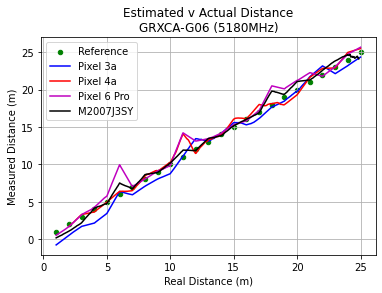

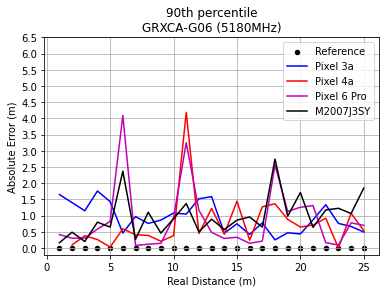

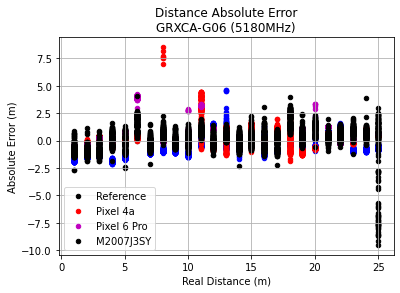

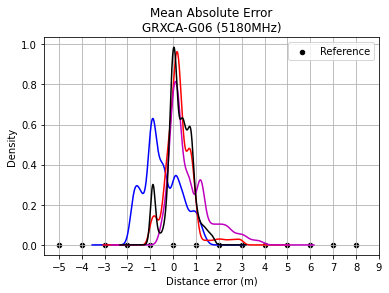

In [16]:
######## General Parameters: #######

# Defining target AP and Frequeny Band
targetAP = apDict["GRXCA-G06 (5180MHz)"]

#Defining the 90% quantile
quantile = 0.9

#Common plot Trend (Reference)
referencePoints = list(range(1, 26))
refPoints_df = pd.DataFrame({'refPoint1': referencePoints, 'refPoint2':referencePoints},columns = ['refPoint1', 'refPoint2'])                    
ax = refPoints_df.plot(kind="scatter",x='refPoint1',y='refPoint2', color="g", label="Reference", grid=True)

null_array = np.zeros(25)

#Common Plot Quantile
df_quantile_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'quantile': null_array},columns = ['Real Distance (m)', 'quantile'])

ax2 = df_quantile_model.plot(kind="scatter",x='Real Distance (m)',y='quantile', color="k",label="Reference" ,grid=True)
ax2.set_yticks(np.arange(0,4.5,.5))

#Common Plot Error
df_abs_error_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'Absolute Error': null_array},columns = ['Real Distance (m)', 'Absolute Error'])
ax3 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Absolute Error', color="k",label="Reference" ,grid=True)

#Common Plot Density Function
pdf_array = list(range(-5,9))
pdf_array_zeros = np.zeros(len(pdf_array))
df_abs_error_model = pd.DataFrame({'Real Distance (m)': pdf_array, 'Density': pdf_array_zeros},columns = ['Real Distance (m)', 'Density'])
ax4 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Density', color="k",label="Reference" ,grid=True)
######## PIXEL 3A ################

# Defining target UE
targetModel = ueDict["Pixel 3a"]

#Defining Color of the plot
color = "b"

#Plotting measurements error
plotError(targetModel,targetAP,burstSize,color,ax3)

#Ploting PDF
plotPDFMeanError(targetModel,targetAP,burstSize,color,ax4)


#Plotting measurements trend
plotTrend(targetModel, targetAP, burstSize, color,ax)

calculateQuantile(targetModel, targetAP, burstSize,quantile, color,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## PIXEL 4A ################
# Defining target UE
targetModel = ueDict["Pixel 4a"]

#Defining Color of the plot
color = "r"

#Defining bias
bias = 2

#Plotting measurements error
plotErrorBias(targetModel, targetAP, burstSize,bias, color,ax3)

#Plot PDF
plotPDFMeanErrorBias(targetModel, targetAP, burstSize,bias, color,ax4)

#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)

#90% Quantile
calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## PIXEL 6 Pro ################
# Defining target UE
targetModel = ueDict["Pixel 6 Pro"]

#Defining Color of the plot
color = "m"

#Defining bias
bias = 1

#Plotting measurements error
plotErrorBias(targetModel, targetAP, burstSize,bias,color,ax3)

#Plot PDF
plotPDFMeanErrorBias(targetModel, targetAP, burstSize,bias, color,ax4)

#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)

#90% Quantile
calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## Xiaomi Mi 10T ################
# Defining target UE
targetModel = ueDict["Xiaomi Mi 10T"]

#Defining Color of the plot
color = "k"

#Defining bias
bias = 3

#Plotting measurements error
plotErrorBias(targetModel, targetAP, burstSize,bias, color,ax3)

#Plot PDF
plotPDFMeanErrorBias(targetModel, targetAP, burstSize,bias, color,ax4)

#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)

#90% Quantile
calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## Plots ################

ax.set_title('Estimated v Actual Distance' + "\n" + "GRXCA-G06 (5180MHz)")
ax.set_xlabel("Real Distance (m)")
ax.set_ylabel("Measured Distance (m)")

ax2.set_title('90th percentile'+ "\n" + "GRXCA-G06 (5180MHz)")
ax2.set_yticks(np.arange(0,7,0.5))
ax2.set_ylabel("Absolute Error (m)")
ax2.set_xlabel("Real Distance (m)")

ax3.set_title('Distance Absolute Error'+ "\n" + "GRXCA-G06 (5180MHz)")
ax3.set_ylabel("Absolute Error (m)")
ax3.set_xlabel("Real Distance (m)")

ax4.set_xticks(np.arange(-5,10, 1.0))
ax4.set_title('Mean Absolute Error'+ "\n" + "GRXCA-G06 (5180MHz)")
ax4.set_ylabel("Density")
ax4.set_xlabel("Distance error (m)")

plt.show()

<b> Observation: </b> It seems to follow the trend whithin a 2m error range.

###  GRXCA-L05 (5540MHz) 

[Pixel 3a]Percentage of under-2M error for estimated distance:0.643
Max std Pixel 3a: 0.3718
Mean std Pixel 3a: 0.1923
[Pixel 4a]Percentage of under-2M error for estimated distance:0.8999
Max std Pixel 4a: nan
Mean std Pixel 4a: nan
[Pixel 6 Pro]Percentage of under-2M error for estimated distance:0.8793
Max std Pixel 6 Pro: 0.5549
Mean std Pixel 6 Pro: 0.1646


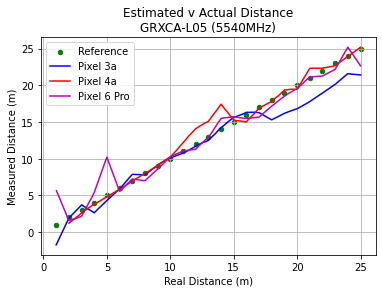

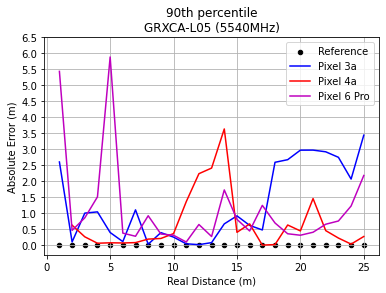

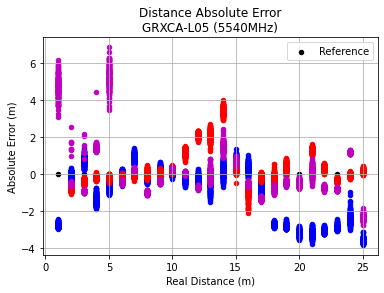

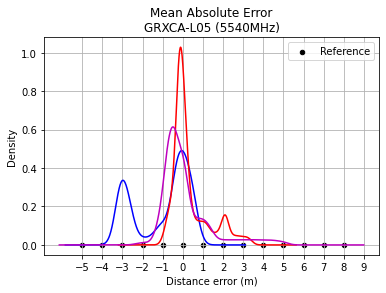

In [17]:
######## General Parameters: #######

# Defining target AP and Frequeny Band
targetAP = apDict["GRXCA-L05 (5540MHz)"]

#Defining the 90% quantile
quantile = 0.9

#Common plot Trend (Reference)
referencePoints = list(range(1, 26))
refPoints_df = pd.DataFrame({'refPoint1': referencePoints, 'refPoint2':referencePoints},columns = ['refPoint1', 'refPoint2'])                    
ax = refPoints_df.plot(kind="scatter",x='refPoint1',y='refPoint2', color="g", label="Reference", grid=True)

null_array = np.zeros(25)

#Common Plot Quantile
df_quantile_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'quantile': null_array},columns = ['Real Distance (m)', 'quantile'])

ax2 = df_quantile_model.plot(kind="scatter",x='Real Distance (m)',y='quantile', color="k",label="Reference" ,grid=True)
ax2.set_yticks(np.arange(0,4.5,.5))

#Common Plot Error
df_abs_error_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'Absolute Error': null_array},columns = ['Real Distance (m)', 'Absolute Error'])
ax3 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Absolute Error', color="k",label="Reference" ,grid=True)

#Common Plot Density Function
pdf_array = list(range(-5,9))
pdf_array_zeros = np.zeros(len(pdf_array))
df_abs_error_model = pd.DataFrame({'Real Distance (m)': pdf_array, 'Density': pdf_array_zeros},columns = ['Real Distance (m)', 'Density'])
ax4 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Density', color="k",label="Reference" ,grid=True)
######## PIXEL 3A ################

# Defining target UE
targetModel = ueDict["Pixel 3a"]

#Defining Color of the plot
color = "b"

#Plotting measurements error
plotError(targetModel,targetAP,burstSize,color,ax3)

#Ploting PDF
plotPDFMeanError(targetModel,targetAP,burstSize,color,ax4)


#Plotting measurements trend
plotTrend(targetModel, targetAP, burstSize, color,ax)

#90% Quantile
calculateQuantile(targetModel, targetAP, burstSize,quantile, color,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## PIXEL 4A ################
# Defining target UE
targetModel = ueDict["Pixel 4a"]

#Defining Color of the plot
color = "r"


#Plotting measurements error
plotError(targetModel, targetAP, burstSize,color,ax3)

#Plot PDF
plotPDFMeanError(targetModel, targetAP, burstSize,color,ax4)

#Plotting measurements trend
plotTrend(targetModel, targetAP, burstSize,color,ax)

#90% Quantile
calculateQuantile(targetModel, targetAP, burstSize,quantile,color,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## PIXEL 6 Pro ################
# Defining target UE
targetModel = ueDict["Pixel 6 Pro"]

#Defining Color of the plot
color = "m"

#Plotting measurements error
plotError(targetModel, targetAP, burstSize,color,ax3)

#Plot PDF
plotPDFMeanError(targetModel, targetAP, burstSize,color,ax4)

#Plotting measurements trend
plotTrend(targetModel, targetAP, burstSize,color,ax)

#90% Quantile
calculateQuantile(targetModel, targetAP, burstSize,quantile,color,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## Xiaomi Mi 10T ################
# Defining target UE
targetModel = ueDict["Xiaomi Mi 10T"]

#Defining Color of the plot
color = "k"

#Plotting measurements error
#plotError(targetModel, targetAP, burstSize, color,ax3)

#Plot PDF
#plotPDFMeanError(targetModel, targetAP, burstSize, color,ax4)

#Plotting measurements trend
#plotTrend(targetModel, targetAP, burstSize,color,ax)

#90% Quantile
#calculateQuantile(targetModel, targetAP, burstSize,quantile,color,ax2)

#Standard Deviation
#calculateStandardDeviation(targetModel, targetAP, burstSize)

######## Plots ################

ax.set_title('Estimated v Actual Distance' + "\n" + "GRXCA-L05 (5540MHz)")
ax.set_xlabel("Real Distance (m)")
ax.set_ylabel("Measured Distance (m)")

ax2.set_title('90th percentile'+ "\n" + "GRXCA-L05 (5540MHz)")
ax2.set_yticks(np.arange(0,7,0.5))
ax2.set_ylabel("Absolute Error (m)")
ax2.set_xlabel("Real Distance (m)")

ax3.set_title('Distance Absolute Error'+ "\n" + "GRXCA-L05 (5540MHz)")
ax3.set_ylabel("Absolute Error (m)")
ax3.set_xlabel("Real Distance (m)")

ax4.set_xticks(np.arange(-5,10, 1.0))
ax4.set_title('Mean Absolute Error'+ "\n" + "GRXCA-L05 (5540MHz)")
ax4.set_ylabel("Density")
ax4.set_xlabel("Distance error (m)")

plt.show()

<b> Observation: </b> Not really
sure what happened from reference point 18 to 25. It seems that the accuracy of the measurements decreased significanly. This results is not consistent with other devices for the same frequency band. Apart from this, the trend seems to follow the real distance.

###  GRXCA-L05 (5240MHz) - Busrt Size = 8 

[Pixel 3a]Percentage of under-2M error for estimated distance:0.97
Max std Pixel 3a: 0.5673
Mean std Pixel 3a: 0.1362
[Pixel 4a]Percentage of under-2M error for estimated distance:0.942
Max std Pixel 4a: nan
Mean std Pixel 4a: nan
[M2007J3SY]Percentage of under-2M error for estimated distance:0.9953
Max std M2007J3SY: 0.8347
Mean std M2007J3SY: 0.5413


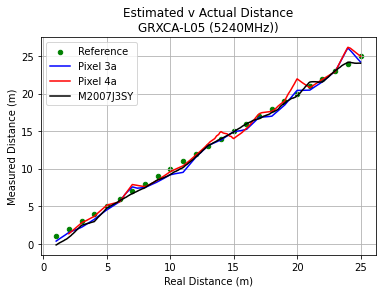

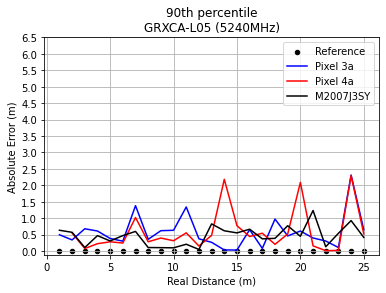

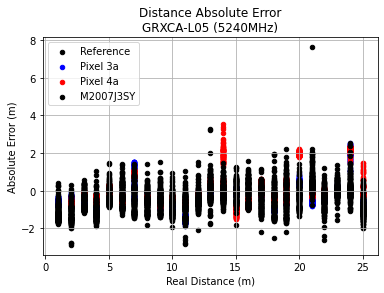

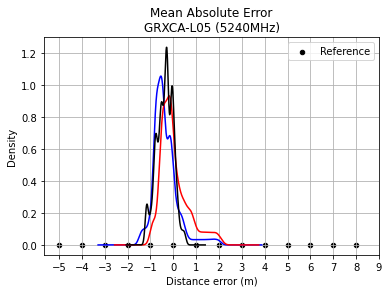

In [18]:
######## General Parameters: #######

# Defining target AP and Frequeny Band
targetAP = apDict["GRXCA-L05 (5240MHz)"]

#Defining the 90% quantile
quantile = 0.9

#Common plot Trend (Reference)
referencePoints = list(range(1, 26))
refPoints_df = pd.DataFrame({'refPoint1': referencePoints, 'refPoint2':referencePoints},columns = ['refPoint1', 'refPoint2'])                    
ax = refPoints_df.plot(kind="scatter",x='refPoint1',y='refPoint2', color="g", label="Reference", grid=True)

null_array = np.zeros(25)

#Common Plot Quantile
df_quantile_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'quantile': null_array},columns = ['Real Distance (m)', 'quantile'])

ax2 = df_quantile_model.plot(kind="scatter",x='Real Distance (m)',y='quantile', color="k",label="Reference" ,grid=True)
ax2.set_yticks(np.arange(0,4.5,.5))

#Common Plot Error
df_abs_error_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'Absolute Error': null_array},columns = ['Real Distance (m)', 'Absolute Error'])
ax3 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Absolute Error', color="k",label="Reference" ,grid=True)

#Common Plot Density Function
pdf_array = list(range(-5,9))
pdf_array_zeros = np.zeros(len(pdf_array))
df_abs_error_model = pd.DataFrame({'Real Distance (m)': pdf_array, 'Density': pdf_array_zeros},columns = ['Real Distance (m)', 'Density'])
ax4 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Density', color="k",label="Reference" ,grid=True)
######## PIXEL 3A ################

# Defining target UE
targetModel = ueDict["Pixel 3a"]

#Defining Color of the plot
color = "b"

#Defining bias
bias = -1

#Plotting measurements error
plotErrorBias(targetModel,targetAP,burstSize,bias,color,ax3)

#Ploting PDF
plotPDFMeanErrorBias(targetModel,targetAP,burstSize,bias,color,ax4)


#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)


calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## PIXEL 4A ################
# Defining target UE
targetModel = ueDict["Pixel 4a"]

#Defining Color of the plot
color = "r"

#Defining bias
bias = 1.5

#Plotting measurements error
plotErrorBias(targetModel,targetAP,burstSize,bias,color,ax3)

#Ploting PDF
plotPDFMeanErrorBias(targetModel,targetAP,burstSize,bias,color,ax4)


#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)

#meanStandardDeviation(targetModel, targetAP, burstSize)

#90% Quantile
calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## Xiaomi Mi 10T ################
# Defining target UE
targetModel = ueDict["Xiaomi Mi 10T"]

#Defining Color of the plot
color = "k"

#Defining bias
bias = 3

#Plotting measurements error
plotErrorBias(targetModel,targetAP,burstSize,bias,color,ax3)

#Ploting PDF
plotPDFMeanErrorBias(targetModel,targetAP,burstSize,bias,color,ax4)


#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)

#90% Quantile
calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## Plots ################

ax.set_title('Estimated v Actual Distance' + "\n" + "GRXCA-L05 (5240MHz))")
ax.set_xlabel("Real Distance (m)")
ax.set_ylabel("Measured Distance (m)")

ax2.set_title('90th percentile'+ "\n" + "GRXCA-L05 (5240MHz)")
ax2.set_yticks(np.arange(0,7,0.5))
ax2.set_ylabel("Absolute Error (m)")
ax2.set_xlabel("Real Distance (m)")

ax3.set_title('Distance Absolute Error'+ "\n" + "GRXCA-L05 (5240MHz)")
ax3.set_ylabel("Absolute Error (m)")
ax3.set_xlabel("Real Distance (m)")

ax4.set_xticks(np.arange(-5,10, 1.0))
ax4.set_title('Mean Absolute Error'+ "\n" + "GRXCA-L05 (5240MHz)")
ax4.set_ylabel("Density")
ax4.set_xlabel("Distance error (m)")

plt.show()


###  GRXCA-G06 (2462MHz) - Busrt Size = 8 

[Pixel 3a]Percentage of under-2M error for estimated distance:0.9235
Max std Pixel 3a: 0.6937
Mean std Pixel 3a: 0.4422
[Pixel 4a]Percentage of under-2M error for estimated distance:0.9049
Max std Pixel 4a: nan
Mean std Pixel 4a: nan
[M2007J3SY]Percentage of under-2M error for estimated distance:0.7592
Max std M2007J3SY: 6.8585
Mean std M2007J3SY: 1.2851


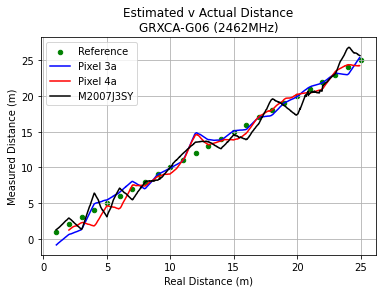

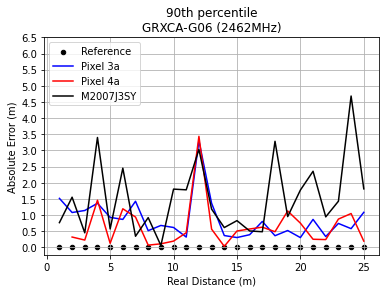

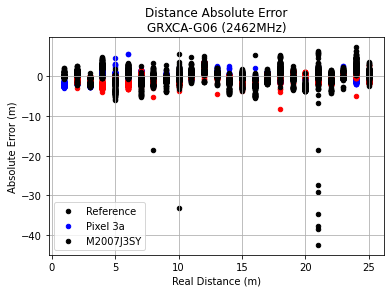

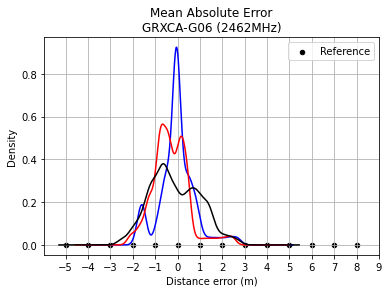

In [19]:
######## General Parameters: #######

# Defining target AP and Frequeny Band
targetAP = apDict["GRXCA-G06 (2462MHz)"]

#Defining the 90% quantile
quantile = 0.9

#Common plot Trend (Reference)
referencePoints = list(range(1, 26))
refPoints_df = pd.DataFrame({'refPoint1': referencePoints, 'refPoint2':referencePoints},columns = ['refPoint1', 'refPoint2'])                    
ax = refPoints_df.plot(kind="scatter",x='refPoint1',y='refPoint2', color="g", label="Reference", grid=True)

null_array = np.zeros(25)

#Common Plot Quantile
df_quantile_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'quantile': null_array},columns = ['Real Distance (m)', 'quantile'])

ax2 = df_quantile_model.plot(kind="scatter",x='Real Distance (m)',y='quantile', color="k",label="Reference" ,grid=True)
ax2.set_yticks(np.arange(0,4.5,.5))

#Common Plot Error
df_abs_error_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'Absolute Error': null_array},columns = ['Real Distance (m)', 'Absolute Error'])
ax3 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Absolute Error', color="k",label="Reference" ,grid=True)

#Common Plot Density Function
pdf_array = list(range(-5,9))
pdf_array_zeros = np.zeros(len(pdf_array))
df_abs_error_model = pd.DataFrame({'Real Distance (m)': pdf_array, 'Density': pdf_array_zeros},columns = ['Real Distance (m)', 'Density'])
ax4 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Density', color="k",label="Reference" ,grid=True)
######## PIXEL 3A ################

# Defining target UE
targetModel = ueDict["Pixel 3a"]

#Defining Color of the plot
color = "b"

#Defining bias
bias = 12

#Plotting measurements error
plotErrorBias(targetModel,targetAP,burstSize,bias,color,ax3)

#Ploting PDF
plotPDFMeanErrorBias(targetModel,targetAP,burstSize,bias,color,ax4)


#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)

#meanStandardDeviation(targetModel, targetAP, burstSize)

#90% Quantile
calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## PIXEL 4A ################
# Defining target UE
targetModel = ueDict["Pixel 4a"]

#Defining Color of the plot
color = "r"

#Plotting measurements error
plotError(targetModel, targetAP, burstSize,color,ax3)

#Plot PDF
plotPDFMeanError(targetModel, targetAP, burstSize,color,ax4)

#Plotting measurements trend
plotTrend(targetModel, targetAP, burstSize,color,ax)

#90% Quantile
calculateQuantile(targetModel, targetAP, burstSize,quantile,color,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

######## Xiaomi Mi 10T ################
# Defining target UE
targetModel = ueDict["Xiaomi Mi 10T"]

#Defining Color of the plot
color = "k"

#Defining bias
bias = 65

#Plotting measurements error
plotErrorBias(targetModel, targetAP, burstSize,bias,color,ax3)

#Plot PDF
plotPDFMeanErrorBias(targetModel, targetAP, burstSize,bias, color,ax4)

#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)

#90% Quantile
calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

############## Plots ##############################

ax.set_title('Estimated v Actual Distance' + "\n" + "GRXCA-G06 (2462MHz)")
ax.set_xlabel("Real Distance (m)")
ax.set_ylabel("Measured Distance (m)")

ax2.set_title('90th percentile'+ "\n" + "GRXCA-G06 (2462MHz)")
ax2.set_yticks(np.arange(0,7,0.5))
ax2.set_ylabel("Absolute Error (m)")
ax2.set_xlabel("Real Distance (m)")

ax3.set_title('Distance Absolute Error'+ "\n" + "GRXCA-G06 (2462MHz)")
ax3.set_ylabel("Absolute Error (m)")
ax3.set_xlabel("Real Distance (m)")

ax4.set_xticks(np.arange(-5,10, 1.0))
ax4.set_title('Mean Absolute Error'+ "\n" + "GRXCA-G06 (2462MHz)")
ax4.set_ylabel("Density")
ax4.set_xlabel("Distance error (m)")

plt.show()

## GRXCA-L05 (2427MHz) - Busrt Size = 8

[M2007J3SY]Percentage of under-2M error for estimated distance:0.7349
Max std M2007J3SY: 4.9586
Mean std M2007J3SY: 1.2566


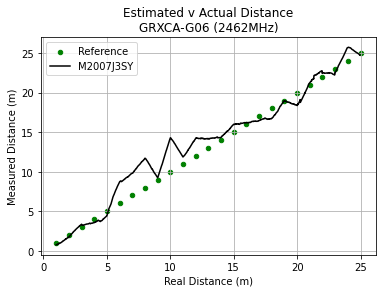

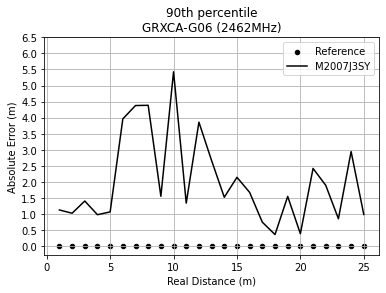

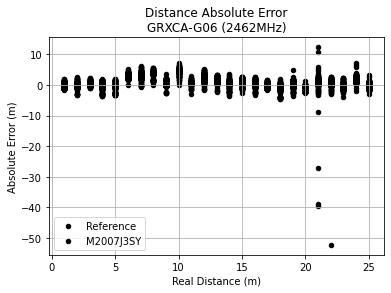

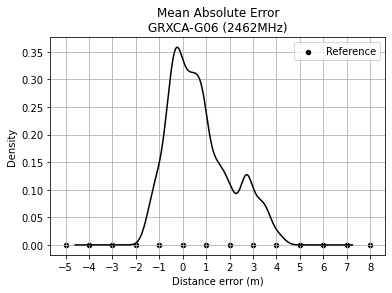

In [20]:
######## General Parameters: #######

# Defining target AP and Frequeny Band
targetAP = apDict["GRXCA-L05 (2427MHz)"]

#Defining the 90% quantile
quantile = 0.9

#Common plot Trend (Reference)
referencePoints = list(range(1, 26))
refPoints_df = pd.DataFrame({'refPoint1': referencePoints, 'refPoint2':referencePoints},columns = ['refPoint1', 'refPoint2'])                    
ax = refPoints_df.plot(kind="scatter",x='refPoint1',y='refPoint2', color="g", label="Reference", grid=True)

null_array = np.zeros(25)

#Common Plot Quantile
df_quantile_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'quantile': null_array},columns = ['Real Distance (m)', 'quantile'])

ax2 = df_quantile_model.plot(kind="scatter",x='Real Distance (m)',y='quantile', color="k",label="Reference" ,grid=True)
ax2.set_yticks(np.arange(0,4.5,.5))

#Common Plot Error
df_abs_error_model = pd.DataFrame({'Real Distance (m)': referencePoints, 'Absolute Error': null_array},columns = ['Real Distance (m)', 'Absolute Error'])
ax3 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Absolute Error', color="k",label="Reference" ,grid=True)

#Common Plot Density Function
pdf_array = list(range(-5,9))
pdf_array_zeros = np.zeros(len(pdf_array))
df_abs_error_model = pd.DataFrame({'Real Distance (m)': pdf_array, 'Density': pdf_array_zeros},columns = ['Real Distance (m)', 'Density'])
ax4 = df_abs_error_model.plot(kind="scatter",x='Real Distance (m)',y='Density', color="k",label="Reference" ,grid=True)

######## Xiaomi Mi 10T ################
# Defining target UE
targetModel = ueDict["Xiaomi Mi 10T"]

#Defining Color of the plot
color = "k"

#Defining bias
bias = 67

#Plotting measurements error
plotErrorBias(targetModel, targetAP, burstSize,bias,color,ax3)

#Plot PDF
plotPDFMeanErrorBias(targetModel, targetAP, burstSize,bias,color,ax4)

#Plotting measurements trend
plotTrendBias(targetModel, targetAP, burstSize,bias, color,ax)

#90% Quantile
calculateQuantileBias(targetModel, targetAP, burstSize,quantile,color,bias,ax2)

#Standard Deviation
calculateStandardDeviation(targetModel, targetAP, burstSize)

################### Plots ##################### 

ax.set_title('Estimated v Actual Distance' + "\n" + "GRXCA-G06 (2462MHz)")
ax.set_xlabel("Real Distance (m)")
ax.set_ylabel("Measured Distance (m)")

ax2.set_title('90th percentile'+ "\n" + "GRXCA-G06 (2462MHz)")
ax2.set_yticks(np.arange(0,7,0.5))
ax2.set_ylabel("Absolute Error (m)")
ax2.set_xlabel("Real Distance (m)")

ax3.set_title('Distance Absolute Error'+ "\n" + "GRXCA-G06 (2462MHz)")
ax3.set_ylabel("Absolute Error (m)")
ax3.set_xlabel("Real Distance (m)")

ax4.set_xticks(np.arange(-5,9,1))
ax4.set_title('Mean Absolute Error'+ "\n" + "GRXCA-G06 (2462MHz)")
ax4.set_ylabel("Density")
ax4.set_xlabel("Distance error (m)")

plt.show()